In [ ]:
pip install boto3

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 139.9/139.9 kB 5.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.9/13.9 MB 63.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85.3/85.3 kB 6.2 MB/s eta 0:00:00


In [ ]:
import boto3

filename = "cardio_clean.csv"
df_predict.to_csv(filename, index=False)

aws_access_key = 'xxx'
aws_secret_key = 'xxx'
region = 'ap-southeast-1'
bucket_name = 'public-bucket-nhuttan-01'


s3 = boto3.client('s3',
                  aws_access_key_id=aws_access_key,
                  aws_secret_access_key=aws_secret_key,
                  region_name=region)

s3.upload_file(Filename=filename,
               Bucket=bucket_name,
               Key=f"data/processed/{filename}")

print(f" ƒê√£ upload {filename} l√™n bucket `{bucket_name}`")

In [ ]:
# ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv('cardio_clean.csv')
df.describe()

age_years        height        weight         ap_hi         ap_lo  \
count  68769.000000  68769.000000  68769.000000  68769.000000  68769.000000   
mean      52.824907    164.409850     74.075032    126.579181     81.291527   
std        6.769811      7.933894     14.181684     16.486010      9.380132   
min       29.000000    100.000000     30.000000     80.000000     40.000000   
25%       48.000000    159.000000     65.000000    120.000000     80.000000   
50%       53.000000    165.000000     72.000000    120.000000     80.000000   
75%       58.000000    170.000000     82.000000    140.000000     90.000000   
max       64.000000    207.000000    180.000000    200.000000    120.000000   

        cholesterol        cardio           bmi  
count  68769.000000  68769.000000  68769.000000  
mean       1.364118      0.494365     27.443978  
std        0.678439      0.499972      5.202859  
min        1.000000      0.000000     13.493001  
25%        1.000000      0.000000     23.875115  
50%        1.000000      0.000000     26.346494  
75%        1.000000      1.000000     30.116213  
max        3.000000      1.000000     60.000000



##  1. Boxplot so s√°nh theo nh√≥m b·ªánh cardio


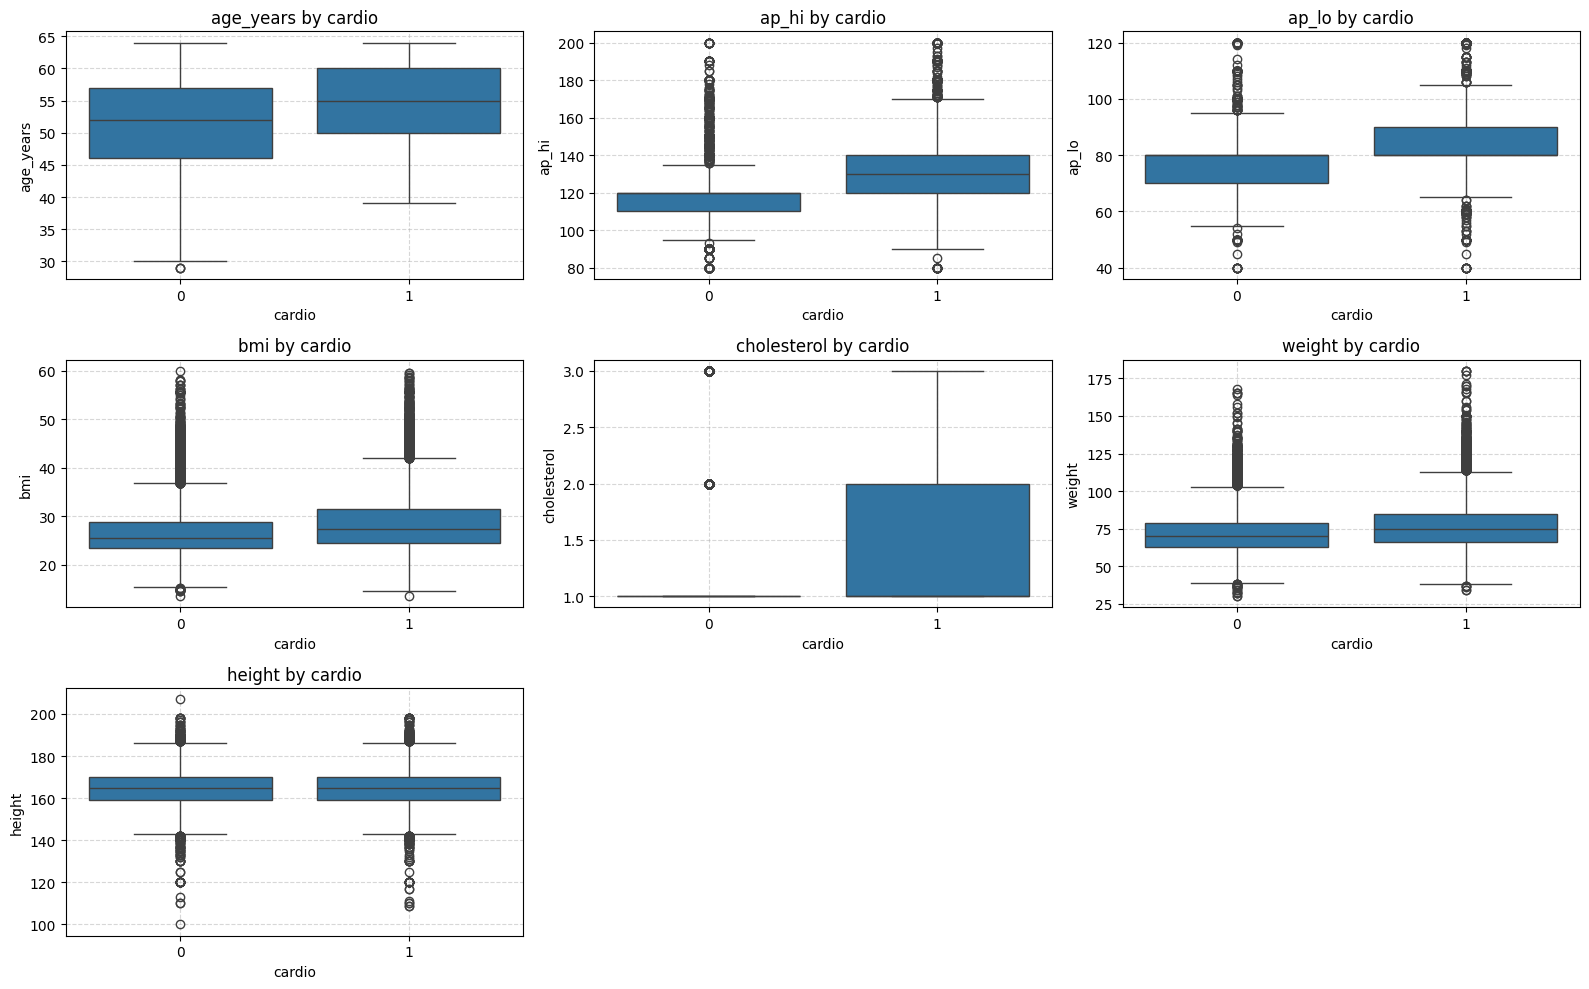

In [ ]:
features = ['age_years', 'ap_hi', 'ap_lo', 'bmi', 'cholesterol', 'weight', 'height']

plt.figure(figsize=(16, 10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='cardio', y=col)
    plt.title(f'{col} by cardio')
    plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 2. Histogram so s√°nh ph√¢n b·ªë theo nh√≥m b·ªánh




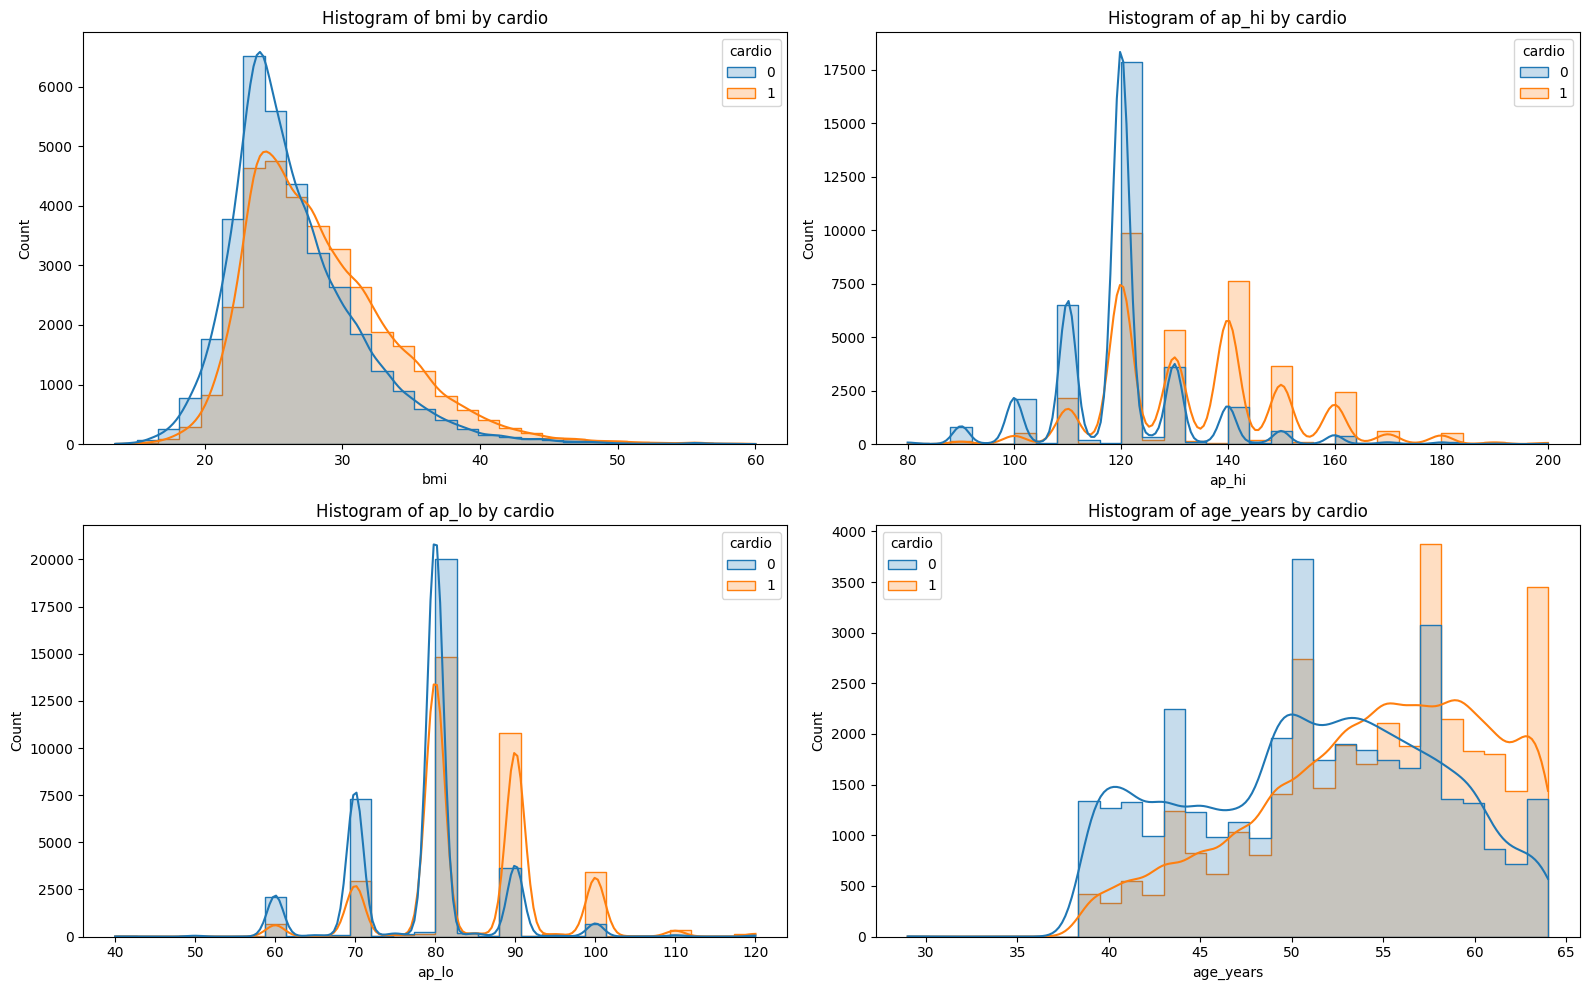

In [ ]:
features = ['bmi', 'ap_hi', 'ap_lo', 'age_years']

plt.figure(figsize=(16, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, hue='cardio', bins=30, kde=True, element="step")
    plt.title(f'Histogram of {col} by cardio')
plt.tight_layout()
plt.show()



 3. Countplot c√°c bi·∫øn ph√¢n lo·∫°i theo cardio



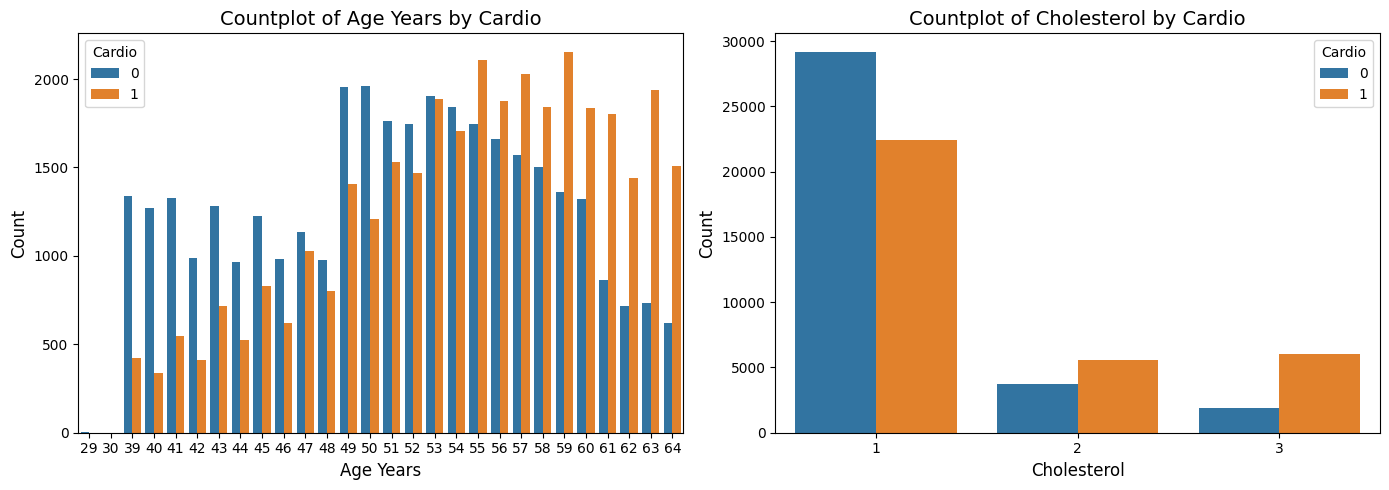

In [ ]:
cat_vars = ['age_years', 'cholesterol']
n = len(cat_vars)

# T√≠nh s·ªë h√†ng v√† c·ªôt ƒë·ªÉ s·∫Øp x·∫øp subplots
ncols = 2
nrows = (n + 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5 * nrows))

axes = axes.flatten()

for i, col in enumerate(cat_vars):
    sns.countplot(data=df, x=col, hue='cardio', ax=axes[i])
    axes[i].set_title(f'Countplot of {col.replace("_", " ").title()} by Cardio', fontsize=14)
    axes[i].set_xlabel(col.replace("_", " ").title(), fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].legend(title='Cardio')

# ·∫®n subplot th·ª´a (n·∫øu c√≥)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


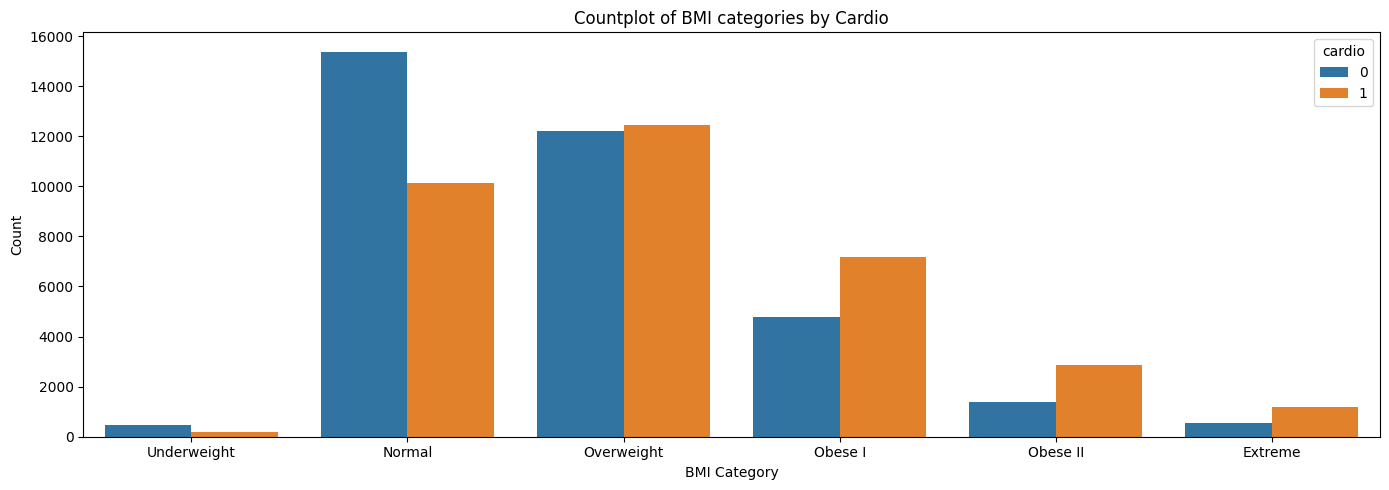

In [ ]:
# Ph√¢n lo·∫°i bmi th√†nh nh√≥m
df['bmi_bin'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 35, 40, 100],
                       labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Extreme'])

# V·∫Ω l·∫°i countplot
plt.figure(figsize=(14, 5))
sns.countplot(data=df, x='bmi_bin', hue='cardio')
plt.title('Countplot of BMI categories by Cardio')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


4. Correlation Heatmap

/tmp/ipython-input-32-3267554007.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


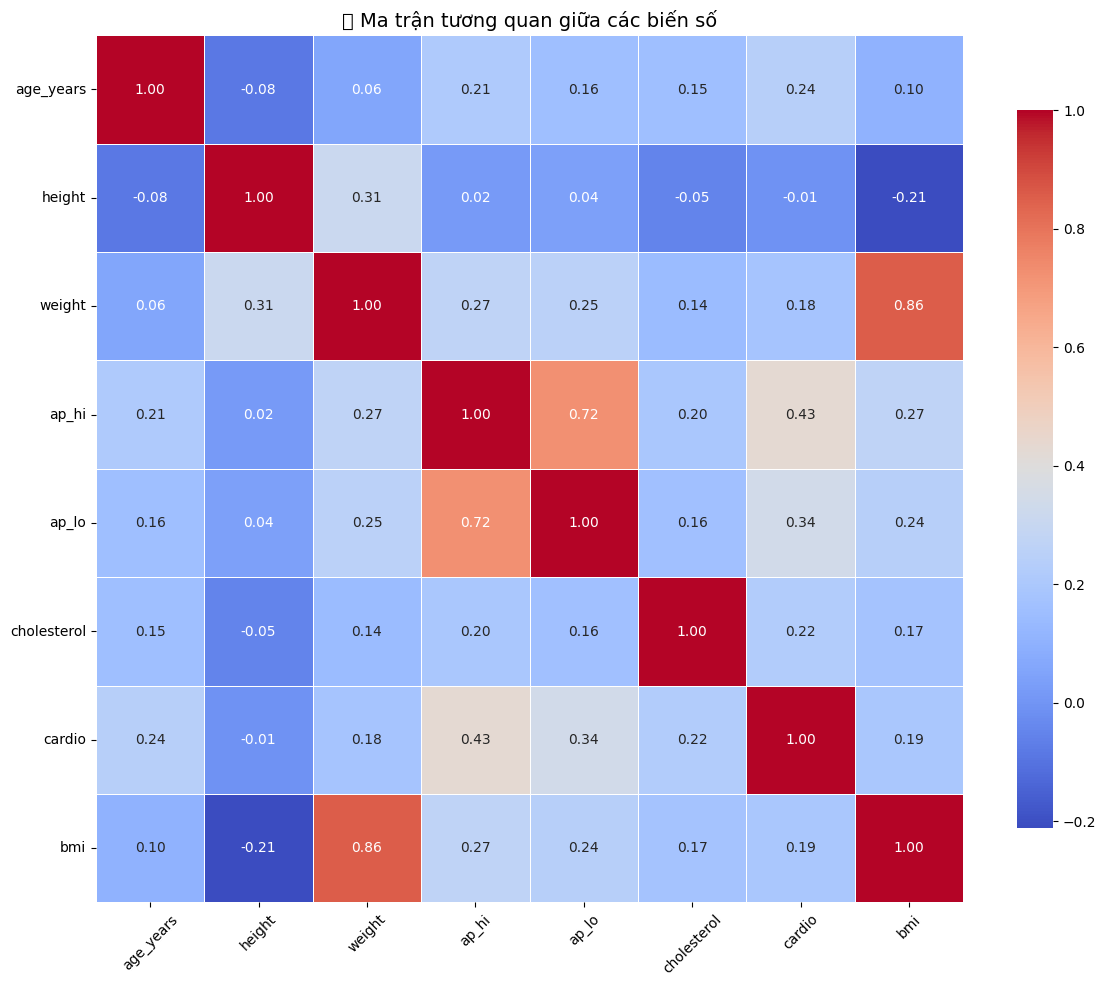

In [ ]:
# 1. Correlation Heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title("üìä Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn s·ªë", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 5. Pairplot

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


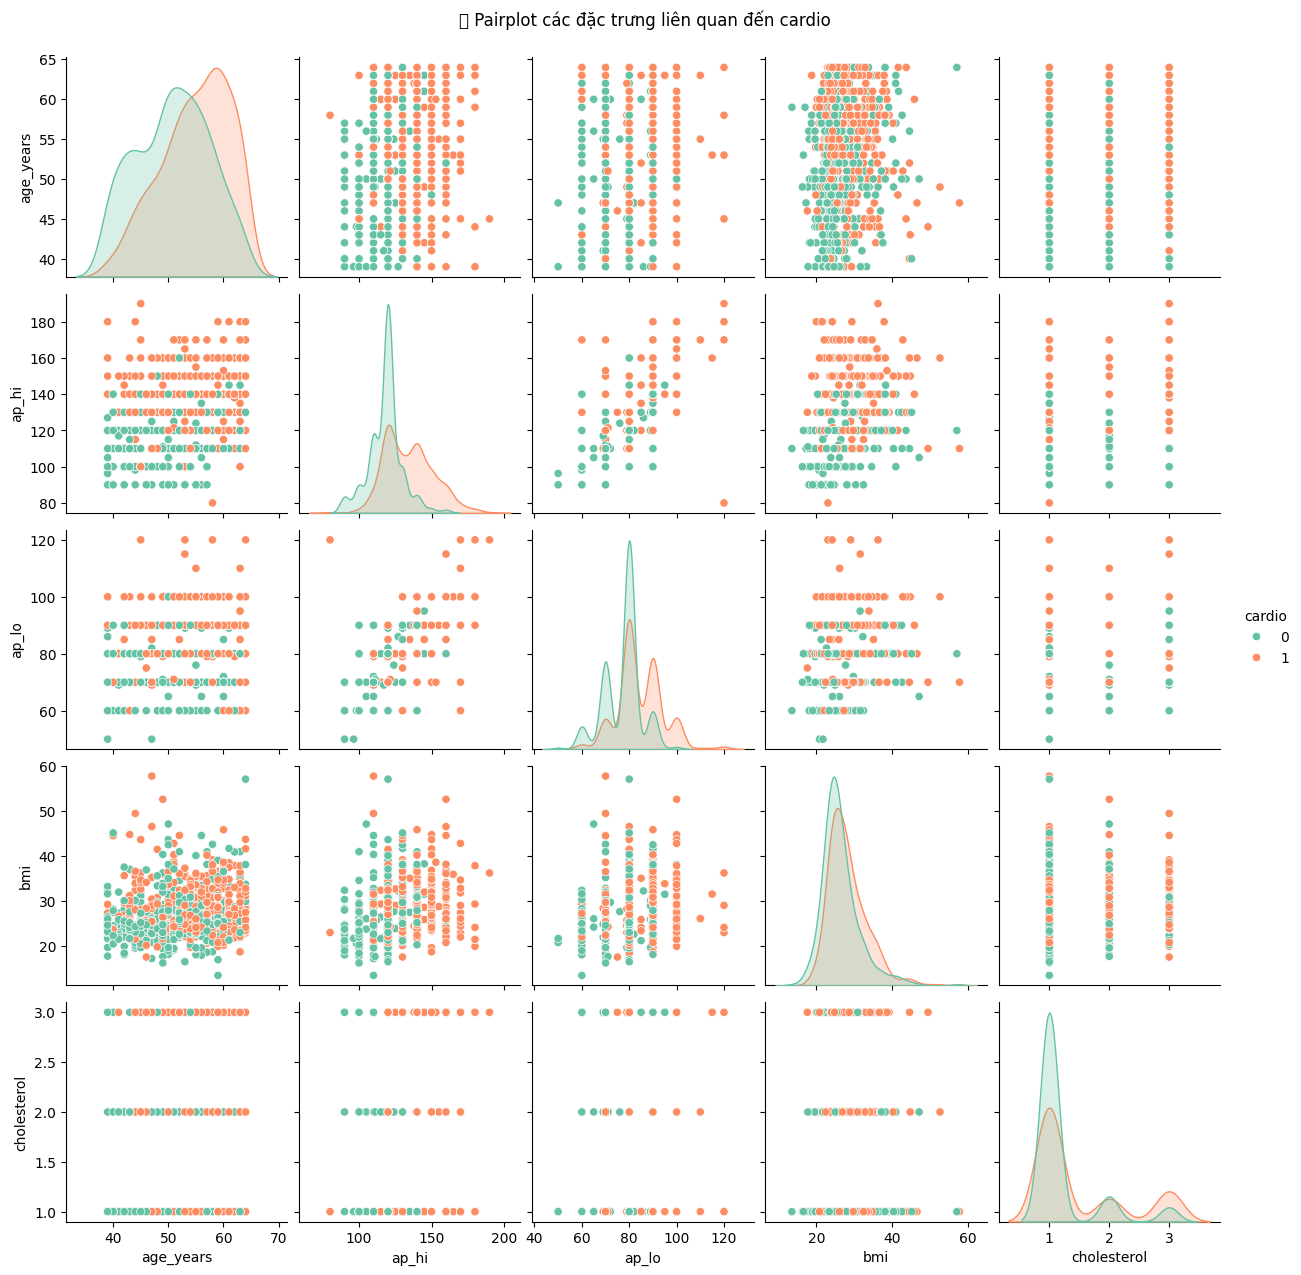

In [ ]:
#  2. Pairplot
selected_features = ['age_years', 'ap_hi', 'ap_lo', 'bmi', 'cholesterol', 'cardio']
df_sample = df[selected_features].sample(1000, random_state=42) if len(df) > 1000 else df[selected_features]
sns.pairplot(df_sample, hue='cardio', diag_kind='kde', palette='Set2')
plt.suptitle(" Pairplot c√°c ƒë·∫∑c tr∆∞ng li√™n quan ƒë·∫øn cardio", y=1.02)
plt.show()


## Pie chart

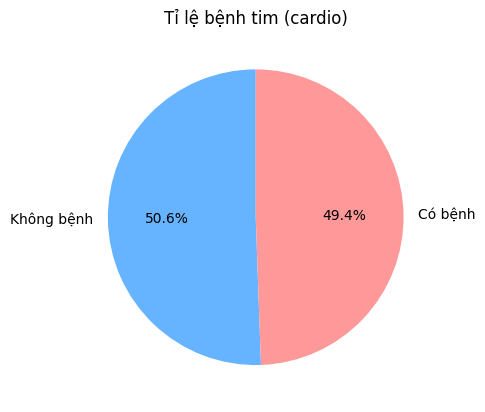

In [ ]:
df['cardio'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['Kh√¥ng b·ªánh', 'C√≥ b·ªánh'], colors=['#66b3ff','#ff9999'])
plt.ylabel('')
plt.title('T·ªâ l·ªá b·ªánh tim (cardio)')
plt.show()
